<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/DS_Unit_2_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [3]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None , na_values=['?'],
                names=[
                    'age', 
                    'workclass',
                    'fnlwgt',
                    'education',
                    'education-num',
                    'marital-status',
                    'occupation',
                    'relationship',
                    'race',
                    'sex',
                    'capital-gain',
                    'capital-loss',
                    'hours-per-week',
                    'native-country',
                    'income'
                ])
df.shape

(32561, 15)

In [0]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# encode every categorical values into numeric. Logistic regression has 
# regularization built-in to handle overfitting problem.

#all_df = pd.get_dummies(train_df).drop('income_ <=50K', axis='columns')

df_all = pd.get_dummies(df.drop('income', axis=1))
df_all.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale

'''MinMaxscaler = minmax_scale
This estimator scales and translates each feature individually such
that it is in the given range on the training set, i.e. between
zero and one.'''

'''scale
Center to the mean and component wise scale to unit variance.'''

'''StandardScaler removes the mean and scales the data to unit variance.'''

'StandardScaler removes the mean and scales the data to unit variance.'

In [0]:
### Using sklearn.preprocessing.scale ### 
#center to mean and scale to unit variance.

from sklearn.preprocessing import scale

X = df._get_numeric_data() # get numerical features only
y = df['income']

colnames=X.columns

#center to mean and scale to unit variance.
X=scale(X)

log_reg = LogisticRegression(solver='lbfgs').fit(X, y)
log_score = log_reg.score(X, y)

zipped = zip(colnames, log_reg.coef_[0])

print(f'LogReg score (excluding categorical value):\n{log_score}')
print('\nLogReg coefficient (using scale)')
for col, coef in sorted(zipped, key=lambda t:t[1], reverse=True):
  print(f'{col}:\t\t {coef}')

LogReg score (excluding categorical value):
0.8153926476459569

LogReg coefficient (using scale)
capital-gain:		 2.3410081381951624
education-num:		 0.8310900882703443
age:		 0.5914866310753542
hours-per-week:		 0.5048868077211447
capital-loss:		 0.2820908843093314
fnlwgt:		 0.06025803610630181


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


In [5]:
### Using minmax_scale ###

# Logistic Regression score excluding categorical value
# Using minmax_scale to value in the range of [0,1]

X = df._get_numeric_data() # get numerical features only
y = df['income']

colnames=X.columns

#X = MinMaxScaler().fit_transform(X)
X=minmax_scale(X)

log_reg = LogisticRegression(solver='lbfgs').fit(X, y)
log_score = log_reg.score(X, y)

zipped = zip(colnames, log_reg.coef_[0])

print(f'LogReg score (excluding categorical value)={log_score}')

print('\nLogReg coefficient (using minmax_scale between [0,1])')
for col, coef in sorted(zipped, key=lambda t:t[1], reverse=True):
  print(f'{col}:\t\t {coef}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  


LogReg score (excluding categorical value)=0.8122600657227972

LogReg coefficient (using minmax_scale between [0,1])
capital-gain:		 18.91269174928919
education-num:		 4.7687095404174675
hours-per-week:		 3.928773917867686
age:		 3.1561438939495274
capital-loss:		 2.840373530589793
fnlwgt:		 0.7929947924867186


In [0]:
# X first row before scaling
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [0]:
# using first row of X as test
print('First row of scale X=\t', X[0])
print('Log Reg coef=\t\t',log_reg.coef_)
print(f'Log Reg prediction={log_reg.predict(X)[0]}')
print(f'Log Reg prediction probability={log_reg.predict_proba(X)[0]}')
print(f'Log Reg intercept={log_reg.intercept_}')

First row of scale X=	 [0.30136986 0.0443019  0.8        0.02174022 0.         0.39795918]
Log Reg coef=		 [[ 3.15614389  0.79299479  4.76870954 18.91269175  2.84037353  3.92877392]]
Log Reg prediction= <=50K
Log Reg prediction probability=[0.59862791 0.40137209]
Log Reg intercept=[-7.17567448]


In [0]:
# TestCase positively correlated to income>50K
test_case = np.array([[1, 0, 1, 1, 0, 0]])
print(f'Log Reg prediction={log_reg.predict(test_case)}')
print(f'Log Reg prediction probability={log_reg.predict_proba(test_case)[0]}')
print(f'Log Reg intercept={log_reg.intercept_}')

Log Reg prediction=[' >50K']
Log Reg prediction probability=[2.89040059e-09 9.99999997e-01]
Log Reg intercept=[-7.17567448]


In [0]:
# TestCase negatively correlated to income>50K 
# test value 0.1 and 0.2 are able to push log reg into <=50K.
test_case = np.array([[0.3,0,0.3,0.2,0,0]]) #no negative coefficient.
print(f'Log Reg prediction={log_reg.predict(test_case)}')
print(f'Log Reg prediction probability={log_reg.predict_proba(test_case)[0]}')
print(f'Log Reg intercept={log_reg.intercept_}')

Log Reg prediction=[' <=50K']
Log Reg prediction probability=[0.73413028 0.26586972]
Log Reg intercept=[-7.17567448]


###Capital-gain, education-num and hours-per-week most positively affect logistic regression outcome to income>50K.

### No clear negative influence.

In [0]:
# Logistic Regression score including all categorical value. Kitchen sink approach.

from sklearn.preprocessing import MinMaxScaler

X = df_all
colnames=X.columns
X = MinMaxScaler().fit_transform(X)

y = df['income']

log_reg = LogisticRegression(solver='lbfgs').fit(X, y)
log_score = log_reg.score(X, y)

print(f'\nLogReg score: {log_score}')
print('\nLogReg coefficient')

zipped = zip(colnames, log_reg.coef_[0])
#for col, coef in sorted(zipped, key=lambda t: t[1], reverse=True):
#  print(f'{col}:\t{coef}')

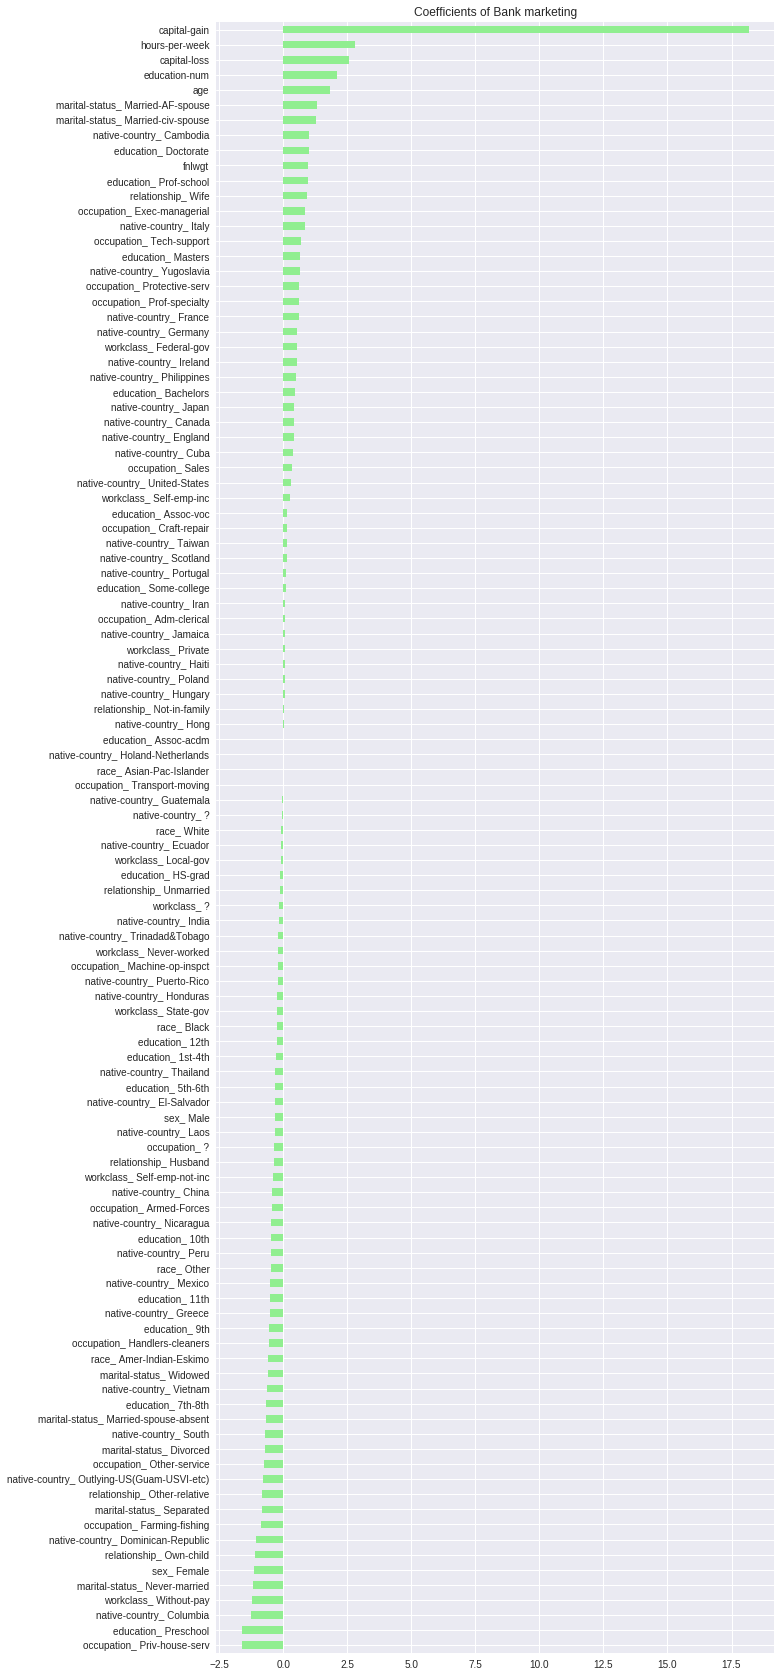

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,30))
plt.title('Coefficients of Bank marketing')

coefficients = log_reg.coef_[0]
features = colnames
pd.Series(coefficients, features).sort_values().plot.barh(color='lightgreen')

### Top 5 positively influences on Logistic Regression to output income>50K
1. capital-gain	:18.18659055368729
2. hours-per-week	:2.8135317922427907
3. capital-loss	:2.5637587474322214
4. education-num	:2.0906191054744014
5. age	:1.8243537775277332

### Top 5 negatively influences on Logistic Regression to output income<50K
1. marital-status_ Never-married	:-1.1856881606407488
2. workclass_ Without-pay	:-1.2197334663061752
3. native-country_ Columbia	:-1.2451173984270385
4. education_ Preschool	:-1.600471724359855
5. occupation_ Priv-house-serv	:-1.618876394176086

Due to scaling when building the Logistic regression model, testcase data need to be scale in order to match the sensitivity of the model.

Minmax_scaler will scale  one observation testcase into zero.

In [0]:
# map column names with position index value
d = {}
for i, name in enumerate(df_all.columns ):
  #print(f'{name}:{i}')
  d[name]=i

d['capital-gain']

3

In [0]:
# building positive testcase; income > 50K
testcase = np.zeros(df_all.shape[1]) 

testcase[d['capital-gain']]=1
testcase[d['hours-per-week']]=1
testcase[d['capital-loss']]=1

log_reg.predict([testcase])

array([' >50K'], dtype=object)

In [0]:
# building negative testcase; income < 50K
testcase = np.zeros(df_all.shape[1]) 

testcase[d['occupation_ Priv-house-serv']]=1
testcase[d['education_ Preschool']]=1
testcase[d['native-country_ Columbia']]=1

log_reg.predict([testcase])

array([' <=50K'], dtype=object)

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

**TODO - your answers!**

### Top 5 positively influences on Logistic Regression to output income>50K
1. capital-gain	:18.18659055368729
2. hours-per-week	:2.8135317922427907
3. capital-loss	:2.5637587474322214
4. education-num	:2.0906191054744014
5. age	:1.8243537775277332

### Top 5 negatively influences on Logistic Regression to output income<50K
1. marital-status_ Never-married	:-1.1856881606407488
2. workclass_ Without-pay	:-1.2197334663061752
3. native-country_ Columbia	:-1.2451173984270385
4. education_ Preschool	:-1.600471724359855
5. occupation_ Priv-house-serv	:-1.618876394176086

###At risk student model - Quantile Regression model

Quantile Regression model estimates the response variable at the conditional median or desired quantile. By the setting the quantile for  'at-risk' student distribution,  Quantile Regression is predicting students who are 'at-risk' receiving bottom grades than those above the quantile receiving good grades.

##Product releasing model - Survival Analysis model

Cox regression (or proportional hazards regression) is method for investigating the effect of several variables upon the time a specified event takes to happen. In the context of an outcome such as death this is known as Cox regression for survival analysis

The Kaplan–Meier estimator  also known as the product limit estimator, is a non-parametric statistic used to estimate the survival function from lifetime data. In medical research, it is often used to measure the fraction of patients living for a certain amount of time after treatment. In other fields, Kaplan–Meier estimators may be used to measure the length of time people remain unemployed after a job loss,  the time-to-failure of machine parts, or how long fleshy fruits remain on plants before they are removed by frugivores. 

####In the case of predicting when a new product is likely to be launched, Kaplan-Meier Survival Analysis is the appropriate model. Based on the history of tech company releasing new product patterns, Kaplan-Meier estimator estimate the likelihood of new product to be released.

###Plant size and yield model - Ridge regression model

Working with a few dozen plants at a time can easily overfit a model. Ridge regression model is effective at overcoming high multi-collinearity data problem from the few dozen plants together. Ridge regression produces robust model predicting results with least residual errors.